# Show used config values

In [ ]:
from collections import defaultdict
import os
import json
from helpers import RESULTS_DIR

# Show possible values for the config files
config_values = defaultdict(set)
folders = [f for f in os.listdir(RESULTS_DIR) if os.path.isdir(os.path.join(RESULTS_DIR, f))]
for folder in folders:
    with open(os.path.join(RESULTS_DIR, folder, 'config.json'), 'r') as f:
        config = json.load(f)
    for key, value in config.items():
        config_values[key].add(str(value))

# Drop experiment name, best, mean, std
ignore = ['experiment_name']
for fitness_method in ['default', 'balanced', 'defensive']:
    ignore.extend([f'best_{fitness_method}', f'mean_{fitness_method}', f'std_{fitness_method}', f'Q5_{fitness_method}', f'Q95_{fitness_method}'])
for key in ignore:
    config_values.pop(key, None)
display(config_values)

# Count runs per config

In [ ]:
from collections import defaultdict
import os
import json
import shutil
from helpers import RESULTS_DIR

ignore = ['experiment_name']
for fitness_method in ['default', 'balanced', 'defensive']:
    ignore.extend([f'best_{fitness_method}', f'mean_{fitness_method}', f'std_{fitness_method}', f'Q5_{fitness_method}', f'Q95_{fitness_method}'])

# Count number of runs per unique config
runs_per_config = defaultdict(int)
folders = [f for f in os.listdir(RESULTS_DIR) if os.path.isdir(os.path.join(RESULTS_DIR, f))]
for folder in folders:
    with open(os.path.join(RESULTS_DIR, folder, 'config.json'), 'r') as f:
        config = json.load(f)
    for key in ignore:
        config.pop(key, None)
    if config['gen'] < config['gens']-1:
        print(f'Incomplete run: {folder}. {config["gen"]} out of {config["gens"]} generations.')
        # Delete folder and contents
        shutil.rmtree(os.path.join(RESULTS_DIR, folder))
        continue
    runs_per_config[str(config)] += 1

# Show number of runs per unique config
for config, runs in sorted(runs_per_config.items(), key=lambda x: x[0], reverse=True):
    print(f'{runs} runs for config {config}')

# File to show plots for the evolution runs

In [ ]:
from plotting import create_plot
from helpers import find_folders, RESULTS_DIR

default_config = { # First experiment with 10 runs
    "randomini": "no",
    "multi_ini": False,
    "n_hidden_neurons": 10,
    "pop_size": 100,
    "mutation_rate": 0.2,
    "normalization_method": "default",
    "fitness_method": "default",
    "pick_parent_method": "tournament",
    "survivor_method": "multinomial",
    "crossover_method": "none",
    "mutation_type": "normal",
    "domain_upper": 1,
    "domain_lower": -1,
}

default_config = { # Second experiment with 30 runs
    "randomini": "no",
    "multi_ini": False,
    "n_hidden_neurons": 10,
    "pop_size": 100,
    "mutation_rate": 0.2,
    "normalization_method": "default",
    "fitness_method": "rank",
    "pick_parent_method": "multinomial",
    "survivor_method": "multinomial",
    "crossover_method": "none",
    "mutation_type": "normal",
    "domain_upper": 1,
    "domain_lower": -1,
}

# variable = {"fitness_method": ["default", "balanced"]}  	        # seems pretty much the same
# variable = {"fitness_method": ["default", "rank"]}  	            # pretty much the same
# variable = {"normalization_method": ["default", "domain_specific"]} # seems consistently slightly worse (puzzling)
# variable = {"normalization_method": ["default", "around_0"]}        # mean is similar, best is sometimes better, sometimes worse, 
# variable = {"pick_parent_method": ["tournament", "greedy"]}         # way better mean obviously, inconsistent best
# variable = {"pick_parent_method": ["tournament", "multinomial"]}    # multinomial seems consistently better
# variable = {"survivor_method": ["multinomial", "greedy"]}           # way better mean obviously, inconsistent best
# variable = {"survivor_method": ["multinomial", "tournament"]}           # tournament seems consistently worse
# variable = {"crossover_method": ["none", "default"]}                # consistently worse mean, similar best
# variable = {"crossover_method": ["none", "ensemble"]}               # consistently worse mean, inconsistent best
# variable = {"randomini": ["no", "yes"]}                           # just luck based
# variable = {"multi_ini": [False, True]}                           # obviously worse scores but better for multi ini eval
variable = {"mutation_type": ["normal", "stochastic_decaying"]}   # better mean, maybe slightly better best

for enemies in [[1], [2], [3], [4], [5], [6], [7], [8]]:
    print(f"Enemies: {enemies}")
    config = default_config.copy()
    config.update({"enemies": enemies})

    folders_list = []
    for value in list(variable.values())[0]:
        config.update({list(variable.keys())[0]: value})

        folders_list.append(find_folders(config))

    create_plot(variable, *folders_list, figsize=(5,3), results_dir=RESULTS_DIR, fitness_method='default')


# Boxplots

number of wins/defeats isn't great as a metric for a boxplot because it only ranges between 0 and 8

In [ ]:
# Boxplots
from plotting import create_boxplot
from helpers import find_folders, RESULTS_DIR

default_config = {
    "randomini": "no",
    "multi_ini": False,
    "n_hidden_neurons": 10,
    "pop_size": 100,
    "mutation_rate": 0.2,
    "normalization_method": "default",
    "fitness_method": "default",
    "pick_parent_method": "tournament",
    "survivor_method": "multinomial",
    "crossover_method": "none",
    "mutation_type": "normal",
    "domain_upper": 1,
    "domain_lower": -1,
}
default_config = {
    "randomini": "no",
    "multi_ini": False,
    "n_hidden_neurons": 10,
    "pop_size": 100,
    "mutation_rate": 0.2,
    "normalization_method": "default",
    "fitness_method": "rank",
    "pick_parent_method": "multinomial",
    "survivor_method": "multinomial",
    "crossover_method": "none",
    "mutation_type": "normal",
    "domain_upper": 1,
    "domain_lower": -1,
}
# variable = {"fitness_method": ["default", "balanced"]} # not much difference
# variable = {"normalization_method": ["default", "domain_specific"]} # not much difference
# variable = {"pick_parent_method": ["tournament", "multinomial"]}
# variable = {"multi_ini": [False, True]} # obviously much better scores for multi ini eval
variable = {"mutation_type": ["normal", "stochastic_decaying"]} # sometimes slightly better, sometimes slightly worse
# variable = {"crossover_method": ["none", "ensemble"]} # sometimes slightly better, sometimes slightly worse

# Same as above but with boxplots
for enemies in [[1], [2], [3], [4], [5], [6], [7], [8]]:
    print(f"Enemies: {enemies}")
    config = default_config.copy()
    config.update({"enemies": enemies})

    folders_list = []
    for value in list(variable.values())[0]:
        config.update({list(variable.keys())[0]: value})
    
        folders_list.append(find_folders(config))

    create_boxplot(variable, *folders_list, figsize=(5,3), results_dir=RESULTS_DIR, randomini_eval=False, multi_ini_eval=False)

# Hardest enemies

In [ ]:
# Make boxplot for each enemy based on the best fitness in each run
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from helpers import find_folders, RESULTS_DIR

def create_enemy_boxplot(config={}, randomini_eval=False, multi_ini_eval=False, figsize=(5,3), results_dir=RESULTS_DIR, save_png=False, metric='gain'):

    add_str = ""
    if randomini_eval:
        add_str = "_randomini"
    elif multi_ini_eval:
        add_str = "_multi-ini"

    data = []
    shortest_folders_len = 1e6
    for enemy in range(1,9):
        config.update({"enemies": [enemy]})
        folders = find_folders(config)
        shortest_folders_len = min(shortest_folders_len, len(folders))

        if not folders:
            print(f'No folders found for enemy: {enemy}')
            return


        runs = []
        for folder in folders:
            # Create empty df with columns for [gain, fitness, fitness_balanced, n_wins]
            df = pd.DataFrame(columns=['gain', 'fitness', 'fitness_balanced', 'wins'])

            # Read results from eval_best.json
            with open(f'{results_dir}/{folder}/eval_best{add_str}.json', 'r') as f:
                saved = json.load(f)
            df = pd.DataFrame(saved["results"])
            # Turn wins list into number of wins if wins is a list type
            if type(df['wins'][0]) == list:
                df['wins'] = df['wins'].apply(lambda x: sum(x))

            # Average over the 5 evals, keep dims
            df = df.mean(axis=0)
            df = df.to_frame().transpose()
            runs.append(df)
        runs = pd.concat(runs, axis=0)

        data.append(runs[metric])
    print(f'Shortest folder list: {shortest_folders_len}')
    plt.figure(figsize=figsize)

    # Plot boxplot(s)
    plt.boxplot(data)
    plt.xticks(range(1,9), range(1,9))
    plt.title(f'{metric.capitalize()} boxplot')

    plt.xlabel('Enemy')
    plt.ylabel(metric.capitalize())
    if save_png:
        if not os.path.exists(f'plots/{str(variable)}'):
            os.makedirs(f'plots/{str(variable)}')
        plt.savefig(f'plots/{str(variable)}/{metric}_boxplot.png')
    plt.show()

print('Evaluated on all initial enemy positions')
create_enemy_boxplot(config={
        "randomini": "no",
        "multi_ini": False,
    },
    randomini_eval=False, multi_ini_eval=True, figsize=(5,3), results_dir=RESULTS_DIR, save_png=False, metric='gain')

print('Evaluated on only default enemy position')
create_enemy_boxplot(config={
        "randomini": "no",
        "multi_ini": False,
    },
    randomini_eval=False, multi_ini_eval=False, figsize=(5,3), results_dir=RESULTS_DIR, save_png=False, metric='gain')

# Delete folders without config

In [ ]:
import os
import json
from helpers import RESULTS_DIR

# Get all folders
folders = [f for f in os.listdir(RESULTS_DIR) if os.path.isdir(os.path.join(RESULTS_DIR, f))]
for folder in folders:
    # Check if config.json exists
    if not os.path.exists(os.path.join(RESULTS_DIR, folder, 'config.json')):
        print(f'No config.json in folder: {folder}, deleting folder')
        for file in os.listdir(os.path.join(RESULTS_DIR, folder)):
            os.remove(os.path.join(RESULTS_DIR, folder, file))
        os.rmdir(os.path.join(RESULTS_DIR, folder))
        continue
    # else:
    #     with open(os.path.join(RESULTS_DIR, folder, 'config.json'), 'r') as f:
    #         config = json.load(f)
    #     if "best_log" not in config:
    #         print(f'No best_log in config.json in folder: {folder}, deleting folder')
    #         # Delete folder and contents
    #         for file in os.listdir(os.path.join(RESULTS_DIR, folder)):
    #             os.remove(os.path.join(RESULTS_DIR, folder, file))
    #         os.rmdir(os.path.join(RESULTS_DIR, folder))
    #         continue

# Update all configs

In [ ]:
import os
import json
from helpers import RESULTS_DIR

# Add variable to all config.json files
variable = "initial_pop_size"
default_value = "default"

folders = [f for f in os.listdir(RESULTS_DIR) if os.path.isdir(os.path.join(RESULTS_DIR, f))]
for folder in folders:
    with open(os.path.join(RESULTS_DIR, folder, 'config.json'), 'r') as f:
        config = json.load(f)
    if variable not in config:
        config.update({variable: default_value})
    with open(os.path.join(RESULTS_DIR, folder, 'config.json'), 'w') as f:
        json.dump(config, f, indent=4)

# Multi Enemy

Enemies: [1, 2, 3, 4, 5, 6, 7, 8]
No folders found with given config


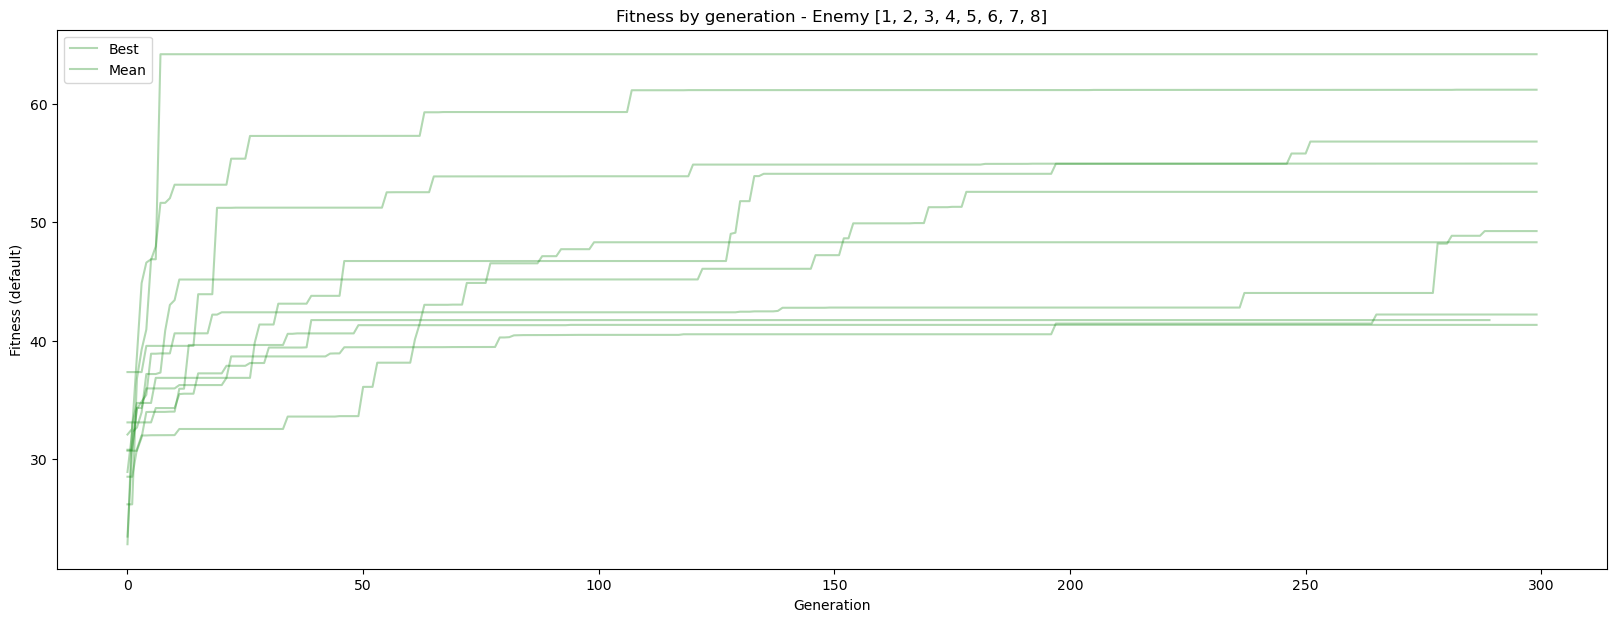

In [63]:
# Make matplotlib plots interactive

from plotting import create_plot
from helpers import find_folders, RESULTS_DIR

default_config = { # Second experiment with 30 runs
    "randomini": "no",
    "multi_ini": False,
    "n_hidden_neurons": 10,
    "pop_size": 100,
    "mutation_rate": 0.2,
    "normalization_method": "default",
    "fitness_method": "rank",
    "pick_parent_method": "multinomial",
    "survivor_method": "multinomial",
    "crossover_method": "none",
    "mutation_type": "KOH",
    "domain_upper": 1,
    "domain_lower": -1,
    # "initial_pop_size": 1000,÷
}


variable = {"mutation_type": ['KOH', 'stochastic_decay']}   # better mean, maybe slightly better best

for enemies in [[1,2,3,4,5,6,7,8]]:
    print(f"Enemies: {enemies}")
    config = default_config.copy()
    config.update({"enemies": enemies})

    folders_list = []
    for value in list(variable.values())[0]:
        config.update({list(variable.keys())[0]: value})

        folders_list.append(find_folders(config))

    create_plot(variable, *folders_list, figsize=(20,7), results_dir=RESULTS_DIR, fitness_method='defualt', plot_separate_lines=1)




In [33]:
type(None)

NoneType

In [43]:
import numpy as np

def addp(n, array=None, U=1, L=0):
    if type(array) == type(None):
        array = np.array([[U], [L]])
    if n == 0:
        return array
    else:
        return addp(
        array=np.vstack(
            (np.hstack((array, np.full((array.shape[0], 1), U))) ,
            np.hstack((array, np.full((array.shape[0], 1), L))))
        ), n=n-1, L=L, U=U
    )

ra = addp(3, U=1.01, L=0.99)

# print pretty array ra
for row in ra[0]:
    print(row)

(ra.sum(axis=1) > 2).sum() / ra.shape[0]    ,   ra , ra.shape[0]

(ra.cumprod(axis=1)[:,-1] > 1).sum() 

1.01
1.01
1.01
1.01


5

In [77]:
# open all folders in results dir which contain in the name KOH and '[1, 2, 3, 4, 5, 6, 7, 8]""
import os
import json
import pandas as pd

from helpers import RESULTS_DIR

folders = [f for f in os.listdir(RESULTS_DIR) if os.path.isdir(os.path.join(RESULTS_DIR, f))]
dfs = [] ; version = 0
for folder in folders:
    if 'KOH' in folder and '[1, 2, 3, 4, 5, 6, 7, 8]' in folder:
        # print(folder)
        with open(os.path.join(RESULTS_DIR, folder, 'config.json'), 'r') as f:
            df = pd.read_csv(os.path.join(RESULTS_DIR, folder, 'results.csv'))
            df['Version'] = version
            version += 1
            dfs.append(df)

dfs = pd.concat(dfs)
dfs



,gen,best_default,mean_default,std_default,Q5_default,Q95_default,best_balanced,mean_balanced,std_balanced,Q5_balanced,Q95_balanced,Version
0,0,22.817469,9.522918,6.999897,-3.416050,20.088949,32.401061,31.857622,5.917581,26.414217,38.703018,0
1,1,32.964908,12.167202,6.128734,-0.871558,20.649278,41.069442,32.203569,7.127057,26.315717,39.381687,0
2,2,34.747018,15.072651,5.481276,7.561865,21.173453,42.034138,33.473109,5.648107,29.729263,42.034138,0
3,3,34.747018,17.948152,5.113814,13.688311,26.197440,42.034138,34.953579,3.588034,31.883554,42.039907,0
4,4,34.747018,19.503705,4.849907,13.489772,26.557514,42.034138,35.299273,3.761148,31.929328,42.039907,0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,42.216154,35.967285,4.147482,27.511116,40.761333,47.740027,41.479989,2.808919,37.475948,47.740027,9
296,296,42.216154,36.818131,3.227257,30.909578,40.761333,47.740027,41.842483,2.718037,37.843954,47.740027,9
297,297,42.216154,36.818131,3.227257,30.909578,40.761333,47.740027,41.842483,2.718037,37.843954,47.740027,9
298,298,42.216154,37.263081,3.529778,31.411194,40.728688,47.740027,42.330678,2.534557,38.401034,46.172076,9


<Axes: >

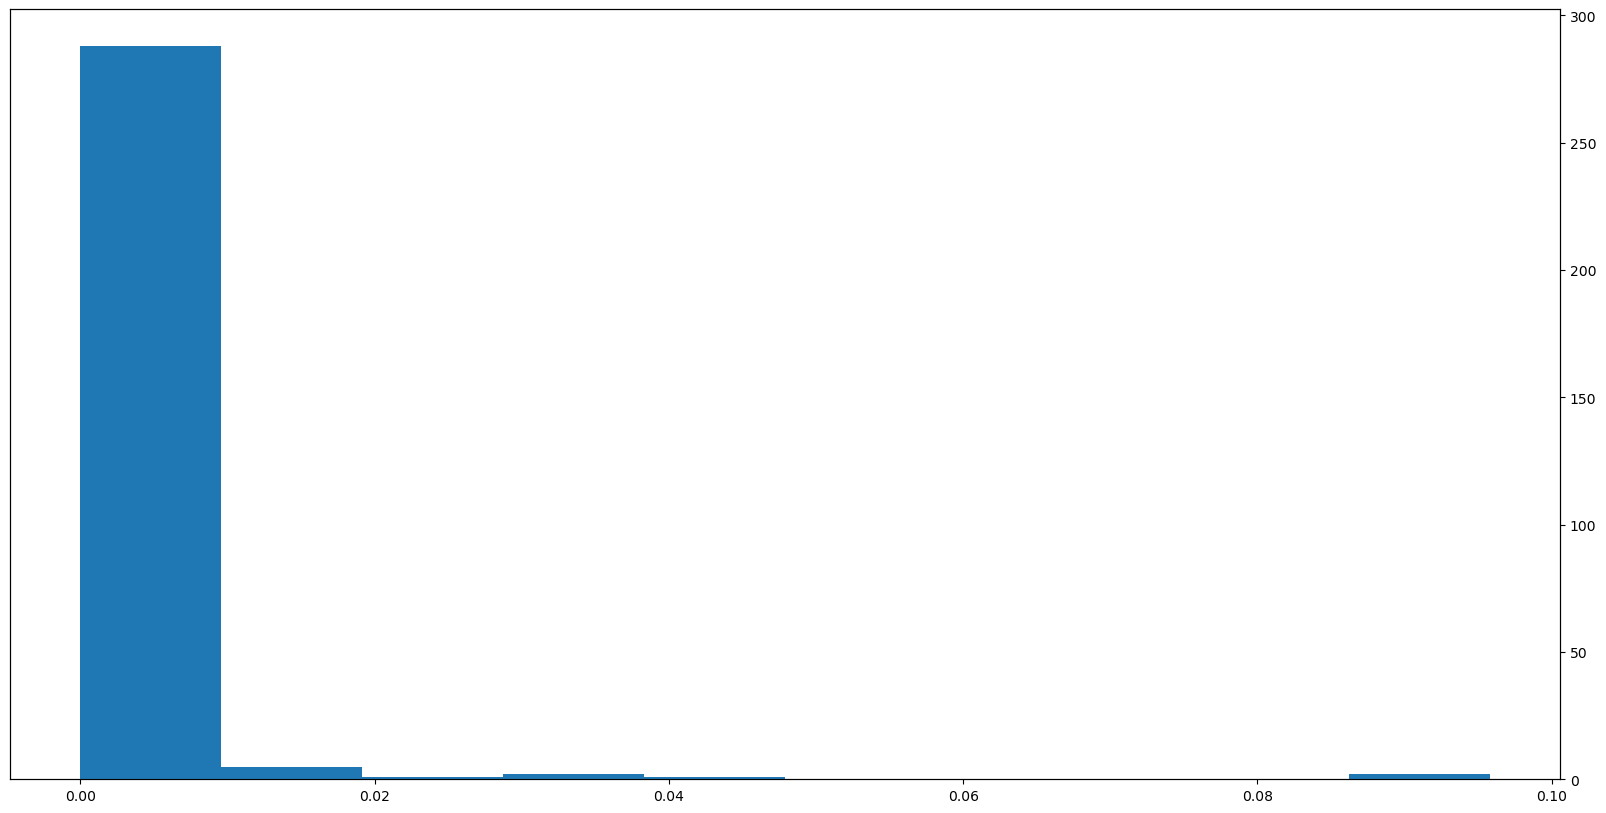

In [104]:
# add a kdeline
pdf['Mean Change'].plot(secondary_y=True, kind='hist')

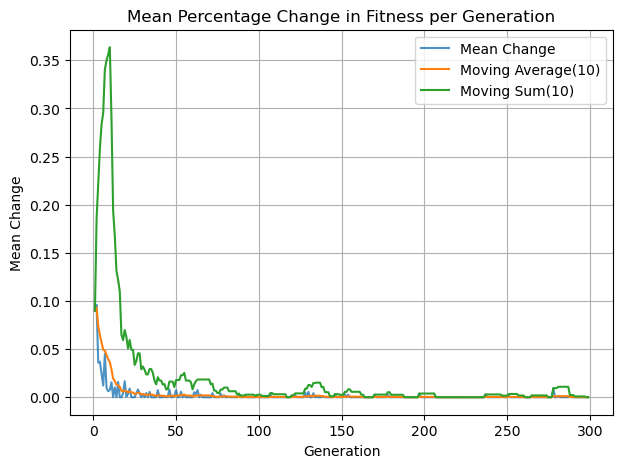

In [126]:
pdf = dfs.pivot(index='gen', columns='Version', values='best_default').pct_change()
pdf['Mean Change'] = pdf.mean(axis=1)

# plot 'Mean Change' column, with legend, grid and kde
ax = pdf['Mean Change'].plot(legend=True, grid=True, alpha=.8)

# add a MA line
pdf['Mean Change'].rolling(10, min_periods=1).mean().plot(ax=ax, legend=True, grid=True)
pdf['Mean Change'].rolling(10, min_periods=1).sum().plot(ax=ax, legend=True, grid=True)

ax.set_xlabel('Generation')
ax.set_ylabel('Mean Change')
ax.legend(['Mean Change', 'Moving Average(10)', 'Moving Sum(10)'])
ax.set_title('Mean Percentage Change in Fitness per Generation')

# change size of figure
fig = ax.get_figure()
fig.set_size_inches(7, 5)
# pdf

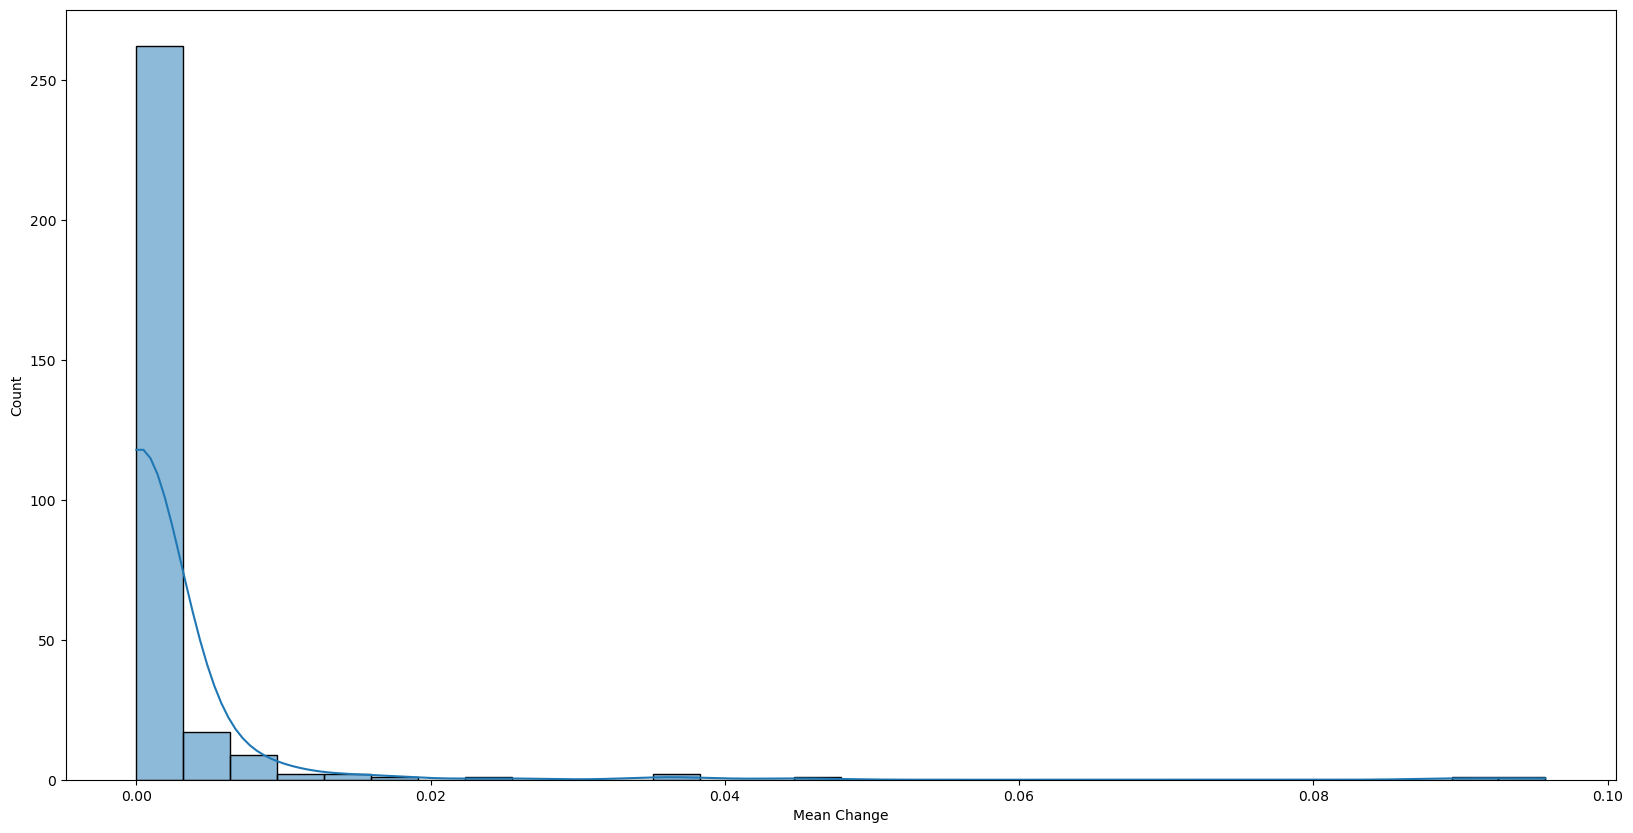

In [111]:
import seaborn as sns

# Plot histogram and KDE
sns.histplot(pdf['Mean Change'], kde=True, bins=30)

# change to log scale
ax.set_yscale('log')

# instad of count change to r

plt.show()